<a href="https://colab.research.google.com/gist/debmalyasaha69/f8e27849719166b6f24949fb312bd127/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats -p /content


100% 1.06G/1.06G [00:52<00:00, 21.5MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')

zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [7]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label
train_ds.map(process)
validation_ds.map(process)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 103ms/step - loss: 1.4558 - accuracy: 0.5749 - val_loss: 0.6159 - val_accuracy: 0.6504
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6124 - accuracy: 0.6603 - val_loss: 0.5332 - val_accuracy: 0.7340
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5424 - accuracy: 0.7260 - val_loss: 0.5892 - val_accuracy: 0.7334
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4770 - accuracy: 0.7756 - val_loss: 0.5941 - val_accuracy: 0.6888
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4189 - accuracy: 0.8102 - val_loss: 0.5552 - val_accuracy: 0.7140
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3681 - accuracy: 0.8406 - val_loss: 0.6137 - val_accuracy: 0.7524
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2907 - accuracy: 0.8803 - val_loss: 0.4492 - val_ac

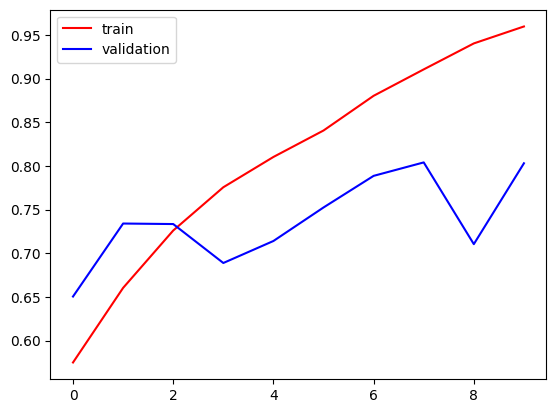

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

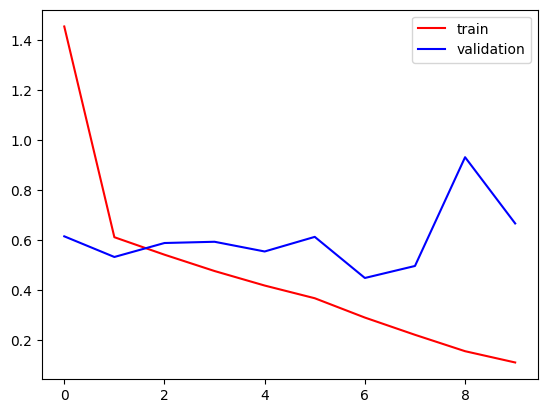

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

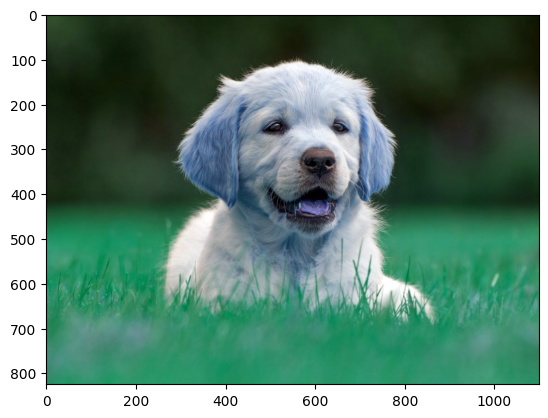

In [34]:
import cv2
test_image=cv2.imread('/content/dog.jpg')
plt.imshow(test_image)

In [35]:
test_image.shape

(825, 1100, 3)

In [36]:
test_image=cv2.resize(test_image,(256,256))

In [37]:
test_input=test_image.reshape((1,256,256,3))

In [40]:
output=model.predict(test_input)
if(output>0.5):
  print("DOG")
else:
  print("CAT")

1/1 [==============================] - 0s 71ms/step
DOG
